In [91]:
#Importamos la libreria pandas
import pandas as pd 
#Importamos la libreria seaborn
import seaborn as sns
#Importamos la libreria numpy
import numpy as np
#Importamos LabelEncoder desde la libreria sklearn
from sklearn.preprocessing import LabelEncoder
#Importamos train_test_split desde la libreria sklearn
from sklearn.model_selection import train_test_split
#Importamos MinMaxScaler desde la libreria sklearn
from sklearn.preprocessing import MinMaxScaler
#Importamos la libreria matplotlib
import matplotlib.pyplot as plt
#Importamos GaussianNB desde la libreria sklearn
from sklearn.naive_bayes import GaussianNB
#Importamos Metric desde la libreria sklearn
from sklearn import metrics
#Importamos la libreria collections
import collections
#Importamos hiden markov model desde la libreria hmmlearn
from hmmlearn import hmm
#Importamos confusion_matrix desde la libreria sklearn
from sklearn.metrics import confusion_matrix
# Importamos acurracy_score desde la libreria sklearn
from sklearn.metrics import accuracy_score
#Importamos recall_score desde la libreria sklearn
from sklearn.metrics import recall_score
#Importamos precision_score desde la libreria sklearn
from sklearn.metrics import precision_score
#Importamos f1_score desde la libreria sklearn
from sklearn.metrics import f1_score
#Importamos la libreria de fuzzy logic
#from fuzzywuzzy import process
#Importamos StandardScaler de la libreria sklearn
from sklearn.preprocessing import StandardScaler

In [62]:
# Establecemos el enlace de conexión del dataset
url = 'https://raw.githubusercontent.com/sfbarragan/AlgoritmosProbabilisticos/master/neo.csv'
# Cargamos el dataset
df = pd.read_csv(url)
# Mostramos los datos del dataset
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


# Descripción del dataset

El dataset contiene información de mas de 90000 asteroides. Dicho dataset contiene 10 atributos, incluida una característica de clase (objetivo) que indica si el asteroide es o no peligroso (True/False). El significado comercial de cada columna (atributo) en los datos es el siguiente:

**Variable objetivo**<br>
hazardous: Clasificación del asteroide como peligroso o no (True/False).<br>

**Variables de entrada**<br>
id: Identificador único de cada asteroide <br>
name: Nombre del asteroide dado por la NASA<br>
est_diameter_min: Diámetro mínimo estimado en kilómetros<br>
est_diameter_max: Diámetro Máximo Estimado en Kilómetros<br>
relative_velocity: Velocidad relativa a la Tierra<br>
miss_distance: Distancia en Kilómetros perdidos<br>
orbiting_body: Planeta que órbita el asteroide<br>
sentry_object: Sistema automatizado de monitoreo de colisiones<br>
absolute_magnitude: Describe la luminosidad intrínseca<br>


# Problema a resolver

Este dataset contiene varios parámetros/características según los cuales un asteroide en particular que ya está clasificado como el objeto más cercano a la Tierra. En base a dichos parámetros se desea predecir si el asteroide puede o no ser peligroso.

Como conocemos que no podemos procesar esa cantidad de datos, hemos optado por realizar un sampling de los datos tomado como muestra un total de 2500 datos para entrenar el modelo. Donde la variable objetivo se denomina hazardous. Existen 9 variables de entrada llamadas: id, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, orbiting_body, sentry_object y absolute_magnitude.

In [110]:
# Obtenemos una muestra del dataset
data_muestra = df.sample(n=2500)
# Mostramos los datos de la muestra
data_muestra.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
81740,54099952,(2020 UM8),0.024241,0.054205,23896.393181,7.999801e+06,Earth,False,25.20,False
33208,3893722,(2019 WR4),0.016016,0.035813,28966.710838,2.067081e+07,Earth,False,26.10,False
42743,3837986,(2019 BJ2),0.058151,0.130029,24140.974272,7.466856e+07,Earth,False,23.30,False
10165,54216326,(2021 VU2),0.007491,0.016751,23112.953726,3.301052e+07,Earth,False,27.75,False
89534,54254424,(2022 ET4),0.041933,0.093765,65154.483812,3.260286e+06,Earth,False,24.01,False


In [111]:
# Contamos los registros del dataset
data_muestra.count()

id                    2500
name                  2500
est_diameter_min      2500
est_diameter_max      2500
relative_velocity     2500
miss_distance         2500
orbiting_body         2500
sentry_object         2500
absolute_magnitude    2500
hazardous             2500
dtype: int64

# Estadisticas generales


In [112]:
#Se hace una descripcion para ver como esta conformado el dataset 
data_muestra.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000
mean,1.441607e+07,0.128781,0.287962,48343.240231,3.737305e+07,23.458837
std,2.088593e+07,0.232094,0.518979,25698.400812,2.230592e+07,2.867067
min,2.001620e+06,0.001058,0.002366,2430.163418,6.529192e+04,14.340000
25%,3.467630e+06,0.020163,0.045086,28404.274779,1.737633e+07,21.300000
50%,3.753694e+06,0.049837,0.111440,44806.365708,3.870836e+07,23.635000
75%,3.892400e+06,0.146068,0.326618,62777.646183,5.708928e+07,25.600000
max,5.427130e+07,3.602093,8.054526,183551.907545,7.479865e+07,32.000000


# Describir resultados estadísticos


Podemos observar una descripción general de los datos de muestra del dataset, observamos la media, varinza, valores minimos y valores maximos. Esto nos da un idea de como esta organizada la data del dataset.

# Descripción de la data


In [113]:
# Mostramos la estructura de los atributos del dataset
data_muestra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 81740 to 69202
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2500 non-null   int64  
 1   name                2500 non-null   object 
 2   est_diameter_min    2500 non-null   float64
 3   est_diameter_max    2500 non-null   float64
 4   relative_velocity   2500 non-null   float64
 5   miss_distance       2500 non-null   float64
 6   orbiting_body       2500 non-null   object 
 7   sentry_object       2500 non-null   bool   
 8   absolute_magnitude  2500 non-null   float64
 9   hazardous           2500 non-null   bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 180.7+ KB


# Limpieza del dataset

In [114]:
#Verificamos la existencia de datos nulos
data_muestra.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [115]:
#Verificamos la existencia  de datos vacios (longitud = 0)
data_muestra.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [116]:
#Eliminamos las columnas que no utilizaremos
data_muestra = data_muestra.drop(columns=['id','name', 'orbiting_body', 'sentry_object'])

# Resultados de la limpieza
El dataset no registra datos nulos, por lo cual no requiere aplicarse una limpieza sobre el mismo, lo unico que haremos es retirar las columnas que no seran utiles para el entrenamiento de los modelos. Las columnas afectadas seran id y nombre.

# Transformación de datos categoricos


In [117]:
# Encontramos los valores unicos para identificar aquellos que son categoricos y los que son continuos
data_muestra.nunique()

est_diameter_min       641
est_diameter_max       641
relative_velocity     2500
miss_distance         2500
absolute_magnitude     641
hazardous                2
dtype: int64

In [118]:
#Creamnos la instancia de labelencoder
labelencoder = LabelEncoder()

#Asignamos los valores numericos a seller_type y los almacenamos en otra columnna
data_muestra["hazardous"] = labelencoder.fit_transform(data_muestra["hazardous"])

# Mostramos las nuevas columnas
data_muestra.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
81740,0.024241,0.054205,23896.393181,7.999801e+06,25.20,0
33208,0.016016,0.035813,28966.710838,2.067081e+07,26.10,0
42743,0.058151,0.130029,24140.974272,7.466856e+07,23.30,0
10165,0.007491,0.016751,23112.953726,3.301052e+07,27.75,0
89534,0.041933,0.093765,65154.483812,3.260286e+06,24.01,0


# Preprocesamiento de datos

In [120]:
# Separamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_muestra.drop('hazardous', axis=1),
                                                    data_muestra['hazardous'],
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((2000, 5), (500, 5))

# Min-Max Scaler

Utilizaremos el metodo MinMaxScaler(), para reducir la dispersión de los datos de las variables independientes para el modelo de Naive Bayes.

In [121]:
# Instanciamos el scalar
scaler = MinMaxScaler()

# Entrenamos el modelo con los datos de entrenamiento
scaler.fit(X_train)

# Transformamos los datos de entrenamiento
X_train_scaled = scaler.transform(X_train)
# Transformamos los datos de prueba
X_test_scaled = scaler.transform(X_test)

In [122]:
# Transformamos la matriz de entrenamiento NumPy devuelta 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# Transformamos la matriz de prueba NumPy devuelta 
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [123]:
# Observamos una estadistica general de los datos de entrenamiento
X_train.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,0.129600,0.289795,48180.774306,3.718747e+07,23.469153
std,0.236813,0.529530,25633.805956,2.232584e+07,2.890138
min,0.001058,0.002366,2430.163418,6.529192e+04,14.340000
25%,0.020163,0.045086,28096.304507,1.699746e+07,21.300000
50%,0.048368,0.108153,44747.253851,3.842894e+07,23.700000
75%,0.146068,0.326618,62773.823531,5.702669e+07,25.600000
max,3.602093,8.054526,183551.907545,7.479865e+07,32.000000


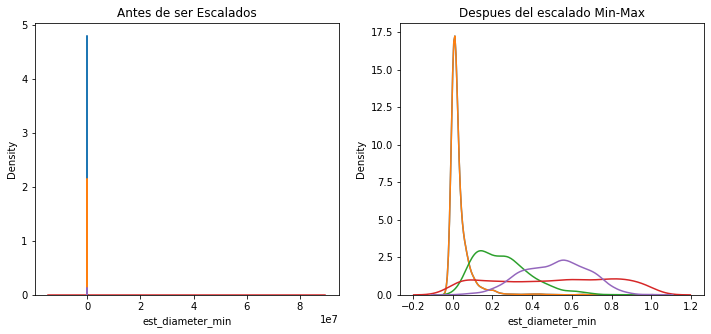

In [124]:
# Asignaremos la escala de la figura
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Creamos el grafico antes de ser escalado
# Asignamos un titulo al grafico
ax1.set_title('Antes de ser Escalados')
# Elegimos los datos a graficar
sns.kdeplot(X_train['est_diameter_min'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['est_diameter_max'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['relative_velocity'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['miss_distance'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['absolute_magnitude'], ax=ax1)

# Creamos el grafico despues normalización media
# Asignamos un titulo al grafico
ax2.set_title('Despues del escalado Min-Max')
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['est_diameter_min'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['est_diameter_max'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['relative_velocity'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['miss_distance'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['absolute_magnitude'], ax=ax2)


# Mostramos las graficas
plt.show()

# Standarisation

Utilizaremos el metodo Standarisation, para reducir la dispersión de los datos de las variables independientes para el modelo de Hiden Markov.

In [125]:
# Instanciamos el escalar
scaler_ST = StandardScaler()

# Alimentamos el escalar con los datos de entrenamiento
scaler_ST.fit(X_train)

# transformamos los datos de entrenamiento
X_train_scaled_ST = scaler.transform(X_train)
# transformamos los datos de prueba
X_test_scaled_ST = scaler.transform(X_test)

In [126]:
# Mostramos los datos aprendidos por el escalar
scaler_ST.mean_

array([1.29600329e-01, 2.89795146e-01, 4.81807743e+04, 3.71874731e+07,
       2.34691530e+01])

In [127]:
# Transformamos en un dataframe los datos obtenidos del array de emtrenamiento
X_train_scaled_ST = pd.DataFrame(X_train_scaled_ST, columns=X_train.columns)
# Transformamos en un dataframe los datos obtenidos del array de emtrenamiento
X_test_scaled_ST = pd.DataFrame(X_test_scaled_ST, columns=X_test.columns)

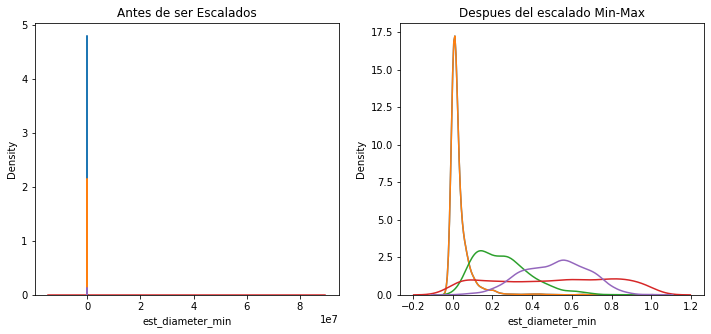

In [128]:
# Asignaremos la escala de la figura
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Creamos el grafico antes de ser escalado
# Asignamos un titulo al grafico
ax1.set_title('Antes de ser Escalados')
# Elegimos los datos a graficar
sns.kdeplot(X_train['est_diameter_min'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['est_diameter_max'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['relative_velocity'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['miss_distance'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['absolute_magnitude'], ax=ax1)

# Creamos el grafico despues normalización media
# Asignamos un titulo al grafico
ax2.set_title('Despues del escalado Min-Max')
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled_ST['est_diameter_min'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled_ST['est_diameter_max'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled_ST['relative_velocity'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled_ST['miss_distance'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled_ST['absolute_magnitude'], ax=ax2)


# Mostramos las graficas
plt.show()

# Resultados de la normalización
Podemos observar como los datos se han normalizado, ubicandose en un rango entre -1 y 1. De esta manera facilitamos el entrenamiento de los modelos predicción probabilisticos.

# Naive Bayes

In [129]:
# Instanciamos el algoritmo gauciano de Naive Bayes
gnb = GaussianNB()

In [130]:
# Alimentamos nuestro modelo con los datos de entrenamiento
# y obtenemos la predicción
y_pred_NB = gnb.fit(X_train_scaled, y_train.values.ravel()).predict(X_test)

In [131]:
# Mostramos el accuracy del modelo Naive Bayes
print("Accuracy Naive Bayes:", metrics.accuracy_score(y_test, y_pred_NB))

Accuracy Naive Bayes: 0.904


# Hidden Markov Model

In [132]:
# Instanciamos el modelo Hidden Markov Model
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train_scaled_ST)

GaussianHMM(n_components=3, n_iter=50, random_state=42)

In [133]:
# realizamos la prueba de predicción del model
y_pred_HMM = model.predict(X_test)

In [134]:
# Mostramos el accuracy del modelo Hidden Markov Model
print("Accuracy Hidden Markov Model:", metrics.accuracy_score(y_test, y_pred_HMM))

Accuracy Hidden Markov Model: 0.902


# Fuzzy Logic

In [29]:
str2Match = "1"

highest = process.extractOne(str2Match,y_train)
print(highest)

NameError: name 'process' is not defined

# Matriz de confusión (Naive Bayes)

In [135]:
#Cramos la matriz de confusión
print(confusion_matrix(y_test, y_pred_NB))

[[452   0]
 [ 48   0]]


<AxesSubplot:>

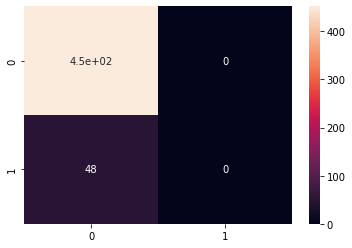

In [136]:
# Presentamos de forma estetica la matriz de confución
sns.heatmap(confusion_matrix(y_test, y_pred_NB), annot=True)

In [137]:
# Obtenemos el accuracy del modelo Naive Bayes
accuracy_score(y_test, y_pred_NB)

0.904

In [138]:
# Obtenemos el recall del modelo Naive Bayes
recall_score(y_test, y_pred_NB, average=None)

array([1., 0.])

In [142]:
# Obtenemos la precisión del modelo Naive Bayes
precision_score(y_test, y_pred_NB, average=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.904, 0.   ])

In [143]:
# Obtenemos f1-score del modelo Naive Bayes
f1_score(y_test, y_pred_NB, average=None)

array([0.94957983, 0.        ])

# Matriz de confusión (Hidden Markov Model)


In [144]:
#Cramos la matriz de confusión
print(confusion_matrix(y_test, y_pred_HMM))

[[451   0   1]
 [ 48   0   0]
 [  0   0   0]]


<AxesSubplot:>

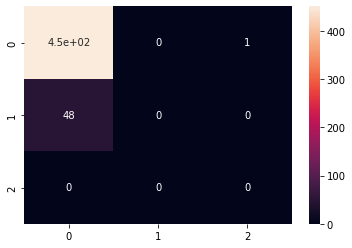

In [145]:
# Presentamos de forma estetica la matriz de confución
sns.heatmap(confusion_matrix(y_test, y_pred_HMM), annot=True)

In [146]:
# Obtenemos f1-score del modelo Hidden Markov Model
accuracy_score(y_test, y_pred_HMM)

0.902

In [147]:
# Obtenemos el recall del modelo Hidden Markov Model
recall_score(y_test, y_pred_HMM, average=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.99778761, 0.        , 0.        ])

In [148]:
# Obtenemos la precisión del modelo Hidden Markov Model
precision_score(y_test, y_pred_HMM, average=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.90380762, 0.        , 0.        ])

In [149]:
# Obtenemos f1-score del modelo Hidden Markov Model
f1_score(y_test, y_pred_HMM, average=None)

array([0.94847529, 0.        , 0.        ])